In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [43]:
df_b1=pd.read_parquet('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2023/rawdata/HX:FILLN=8673', columns=['LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY']).dropna()
df_b2=pd.read_parquet('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2023/rawdata/HX:FILLN=8672', columns=['LHC.BCTFR.A6R4.B2:BUNCH_INTENSITY']).dropna()


In [44]:
# Add a column to the dataframe which contain the number of non-zero elements in the array of column LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY
df_b1['nonzero']=df_b1['LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY'].apply(lambda x: np.count_nonzero(x))

# Get the row with the maximum number of non-zero elements
df_b1_max=df_b1[df_b1['nonzero']==df_b1['nonzero'].max()]

df_b1_max

,LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY,nonzero
1682609178296802000,"[144846030000.0, 146387390000.0, 159032900000....",1020
1682609183296814000,"[144842820000.0, 146387390000.0, 159024870000....",1020
1682609184296802000,"[144834600000.0, 146367710000.0, 159020450000....",1020
1682609185296802000,"[144841160000.0, 146371990000.0, 159022710000....",1020
1682609188296801000,"[144853470000.0, 146373330000.0, 159033110000....",1020
...,...,...
1682609168296803000,"[144849850000.0, 146372330000.0, 159029690000....",1020
1682609170296803000,"[144847260000.0, 146384000000.0, 159030980000....",1020
1682609171296814000,"[144858280000.0, 146385170000.0, 159036110000....",1020
1682609173296795000,"[144846230000.0, 146365300000.0, 159022270000....",1020


In [45]:
b1 = [1 if x>1e6 else 0 for x in df_b1_max.iloc[0].values[0]]

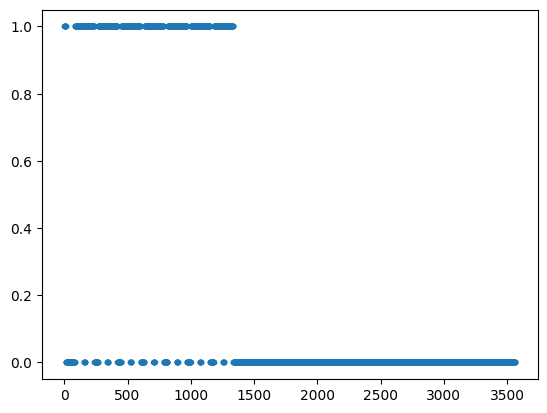

In [46]:
plt.plot(b1, '.')

In [47]:
# Add a column to the dataframe which contain the number of non-zero elements in the array of column LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY
df_b2['nonzero']=df_b2['LHC.BCTFR.A6R4.B2:BUNCH_INTENSITY'].apply(lambda x: np.count_nonzero(x))

# Get the row with the maximum number of non-zero elements
df_b2_max=df_b2[df_b2['nonzero']==df_b2['nonzero'].max()]

df_b2_max

,LHC.BCTFR.A6R4.B2:BUNCH_INTENSITY,nonzero
1682597667296795000,"[138962880000.0, 143865610000.0, 146946770000....",1896
1682597668296803000,"[138962160000.0, 143853910000.0, 146943640000....",1896
1682597669296813000,"[138947900000.0, 143852880000.0, 146945080000....",1896
1682597670296796000,"[138964220000.0, 143856190000.0, 146943210000....",1896
1682597673296802000,"[138954310000.0, 143849160000.0, 146959120000....",1896
...,...,...
1682601594296803000,"[127405500000.0, 131917110000.0, 136631290000....",1896
1682601596296805000,"[127385264000.0, 131887374000.0, 136618280000....",1896
1682601598296803000,"[127372890000.0, 131885720000.0, 136614355000....",1896
1682601600296801000,"[127379890000.0, 131886140000.0, 136623030000....",1896


In [48]:
b2 = [1 if x>1e6 else 0 for x in df_b2_max.iloc[0].values[0]]

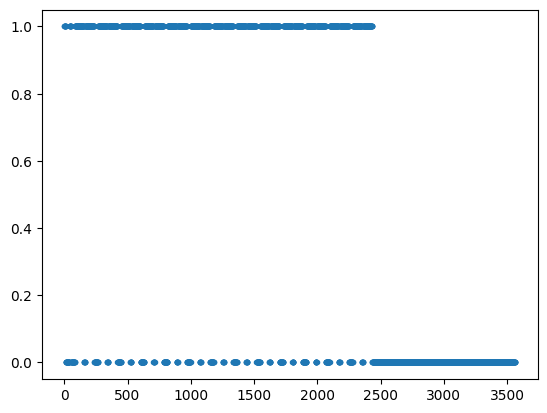

In [49]:
plt.plot(b2, '.')

In [51]:
print(len(b1), len(b2))

3564 3564


In [50]:
# Drop both filling schemes in a json
with open('filling_scheme_scrubbing.json', 'w') as f:
    json.dump({'beam1':b1, 'beam2':b2}, f)